In [2]:
from matplotlib.font_manager import fontManager
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set(font='Malgun Gothic',
       rc ={'axes.unicode_minus':False},
       style='whitegrid')

## data

In [3]:
prfm = pd.read_excel("../../data/train/performance.xlsx", header=1)
rating = pd.read_excel("../../data/train/ratings.xlsx", header=1)
test = pd.read_excel("../../data/test/test.xlsx", header=1)

df = prfm.copy()

### missing value detection

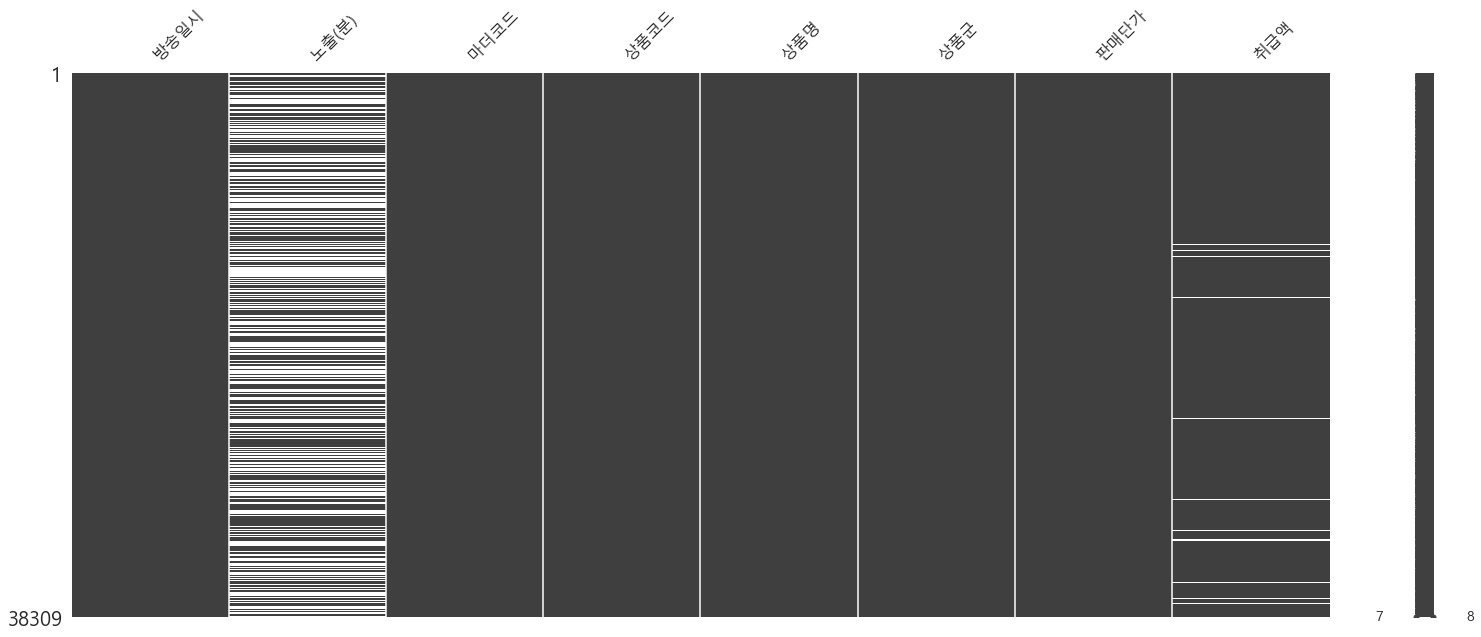

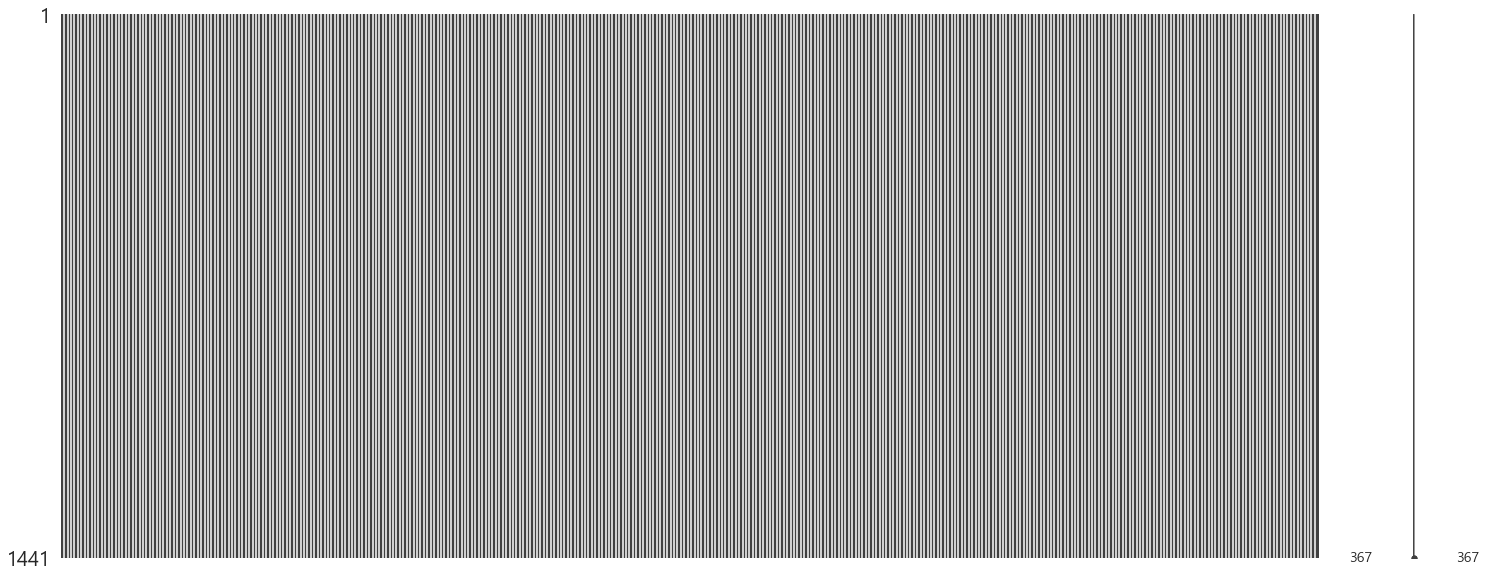

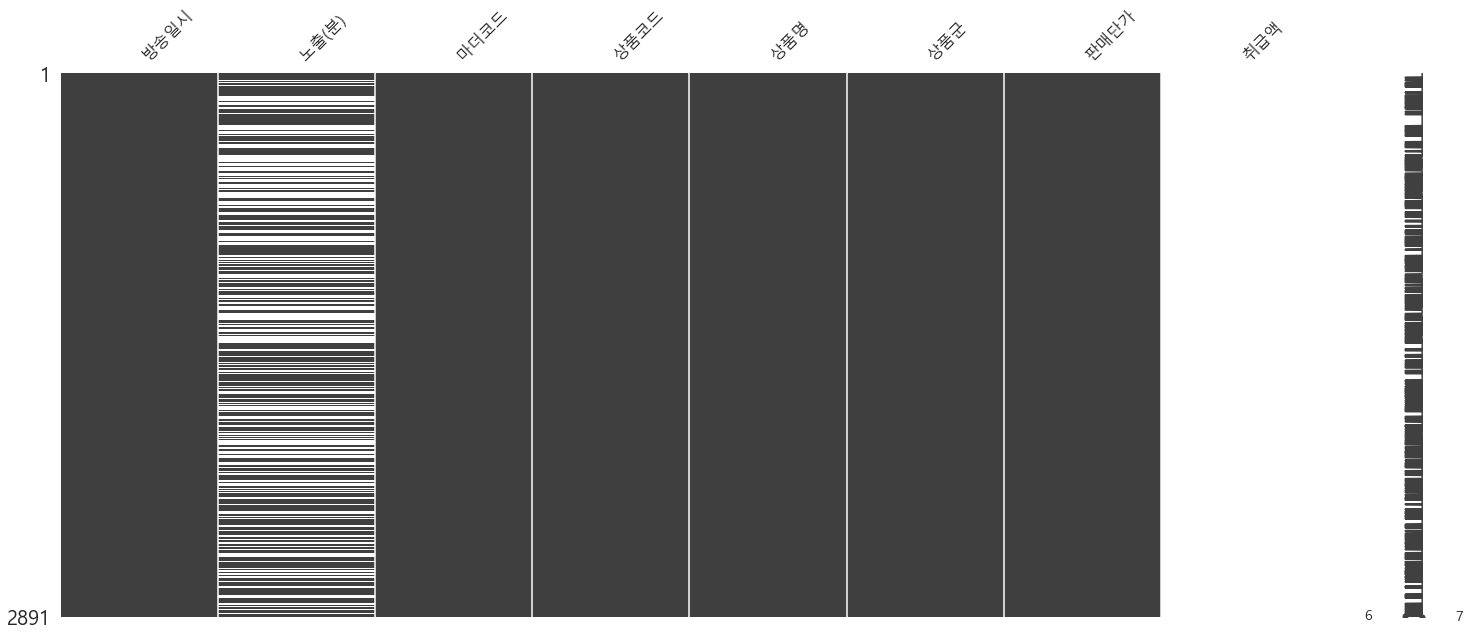

In [4]:
for data in [prfm,rating,test]:
    msno.matrix(data) 

### data info

In [5]:
df.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0


In [6]:
rating.head()

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
0,02:00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.003
1,02:01,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.012,0.003
2,02:02,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.004
3,02:03,0.0,0.0,0.014,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004
4,02:04,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004


In [7]:
test.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2020-06-01 06:20:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
1,2020-06-01 06:40:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
2,2020-06-01 07:00:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
3,2020-06-01 07:20:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN
4,2020-06-01 07:40:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN


In [8]:
print(prfm.shape, test.shape, rating.shape, sep=", ")

(38309, 8), (2891, 8), (1441, 367)


In [9]:
df.describe()

,노출(분),마더코드,상품코드,판매단가,취급액
count,21525.000000,38309.000000,38309.000000,3.830900e+04,3.737200e+04
mean,20.174664,100390.972148,201219.923334,4.565537e+05,2.187305e+07
std,3.633757,249.927870,735.677344,7.260555e+05,2.019140e+07
min,2.466667,100000.000000,200000.000000,0.000000e+00,5.000000e+04
25%,20.000000,100155.000000,200550.000000,5.900000e+04,6.880750e+06
50%,20.000000,100346.000000,201167.000000,1.090000e+05,1.612950e+07
75%,20.000000,100596.000000,201863.000000,4.990000e+05,3.163125e+07
max,60.000000,100849.000000,202513.000000,7.930000e+06,3.220090e+08


In [10]:
test.describe()

,노출(분),마더코드,상품코드,판매단가,취급액
count,1780.000000,2891.000000,2891.000000,2.891000e+03,0.0
mean,20.043530,100388.821169,201200.461778,4.014418e+05,NaN
std,4.573114,256.736363,775.042292,6.046480e+05,NaN
min,5.950000,100003.000000,200003.000000,0.000000e+00,NaN
25%,20.000000,100148.000000,200417.000000,4.090000e+04,NaN
50%,20.000000,100388.000000,201277.000000,7.990000e+04,NaN
75%,20.000000,100593.000000,201818.000000,5.480000e+05,NaN
max,60.000000,100849.000000,202511.000000,4.320000e+06,NaN


In [11]:
rating.describe()

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
count,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,...,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000
mean,0.003681,0.005564,0.001731,0.002658,0.002079,0.002858,0.002703,0.002152,0.002730,0.001947,...,0.010427,0.006006,0.006026,0.006806,0.003879,0.006118,0.004477,0.004576,0.004910,0.004297
std,0.008067,0.012898,0.006213,0.008908,0.007124,0.008478,0.006594,0.006987,0.008164,0.008277,...,0.015119,0.012908,0.012975,0.013342,0.009357,0.012180,0.010604,0.010783,0.013289,0.001512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004000
75%,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013000,0.012000,0.002000,0.010000,0.000000,0.007000,0.000000,0.000000,0.000000,0.005000
max,0.069000,0.073000,0.073000,0.059000,0.070000,0.081000,0.039000,0.078000,0.049000,0.089000,...,0.077000,0.118000,0.095000,0.108000,0.080000,0.093000,0.075000,0.069000,0.108000,0.008000


__데이터가 잘 불러와졌음을 확인<br/>  prfm, test 데이터에 각각 노출(분)에 대한 결측치 존재하고, 취급액에 대한 결측치 존재<br/>  
test 데이터에서 취급액은 예측해야 할 대상이므로 상관 무<br/>  rating 데이터는 0이 굉장히 많은 sparse한 데이터이므로 어떻게 처리할지 충분히 고민해봐야 함__

------------------------------------
__sparse한 rating 데이터 활용 방안 고려<br/>  취급액이 존재하지 않는 prfm 데이터 제거<br/>  노출(분)을 어떻게 처리할지에 대한 고민__

## simple preprocessing

### 취급액이 없는 경우 제거

In [12]:
df2 = df.dropna(subset=['취급액'])

In [13]:
df.shape, df2.shape

((38309, 8), (37372, 8))

### 주문량 구하기

In [14]:
df2["주문량"] = df2["취급액"] / df2["판매단가"]

C:\Users\cktna\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df3 = df2[df2["판매단가"] <= df2["취급액"]]

### 방송일시 분할

In [16]:
df3["연"] = prfm["방송일시"].dt.year
df3["월"] = prfm["방송일시"].dt.month
df3["일"] = prfm["방송일시"].dt.day
df3["시간"] = prfm["방송일시"].dt.hour
df3["분"] = prfm["방송일시"].dt.minute
df3["요일"] = prfm["방송일시"].dt.weekday

C:\Users\cktna\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cktna\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cktna\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

### 노출 NA imputation 기준: 같은 방송일시의 노출 시간

In [17]:
df3["노출(분)"] = df3["노출(분)"].fillna(method='ffill')                                                                    

C:\Users\cktna\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## visualization

### Train 

#### 상품군별 분포

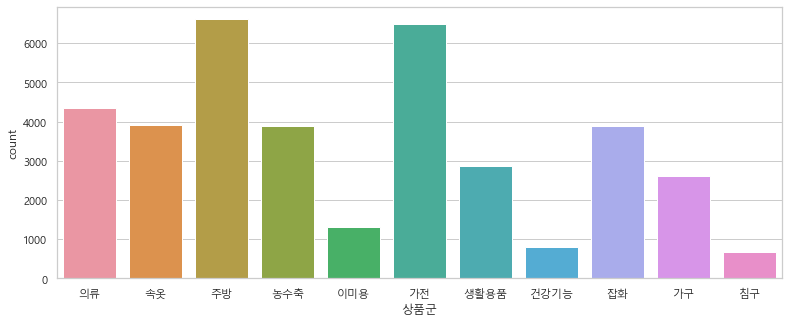

In [18]:
plt.figure(figsize=(13,5))
sns.countplot(x="상품군", data=df2)

__주방, 가전상품군 방송 횟수 다수<br/> 의외로 농수축은 방송 횟수가 그리 높지 않음__ 

In [19]:
prfm_tmp = df3.groupby("상품코드")['주문량'].sum().reset_index()

prfm_tmp2 = prfm_tmp.sort_values(by="주문량",ascending=False).reset_index().iloc[:10,:]

prfm_tmp3 = pd.merge(prfm_tmp2, df3[df3["상품코드"].isin(set(prfm_tmp2["상품코드"]))][["상품코드","상품명"]], on="상품코드",how="left")

#### 상품코드별 주문량 상위 10개

In [20]:
df3['주문량'].mean()

314.7707483014743

In [21]:
prfm_tmp3.head()

,index,상품코드,주문량,상품명
0,709,200864,465758.867314,안동간고등어 20팩
1,709,200864,465758.867314,안동간고등어 20팩
2,709,200864,465758.867314,안동간고등어 20팩
3,709,200864,465758.867314,안동간고등어 20팩
4,709,200864,465758.867314,안동간고등어 20팩


[Text(0, 0, 'AAB의 소곱창전골 800g x 8팩'),
 Text(0, 0, '비버리힐스폴로클럽 남성기초세트(2018FW골드)'),
 Text(0, 0, '비버리힐스폴로클럽 남성기초세트(골드+콜라겐)'),
 Text(0, 0, '에코라믹 통주물 스톤 냄비세트'),
 Text(0, 0, '유귀열의 귀한 갓김치3kg+총각김치3kg (총6kg)'),
 Text(0, 0, '임성근의 녹용도가니탕 풀세트'),
 Text(0, 0, '안동간고등어 20팩'),
 Text(0, 0, '국내산 손질갑오징어 8팩'),
 Text(0, 0, '옛날 그 쥐포 110장 (11팩)'),
 Text(0, 0, '멋진밥상 흥양농협 쌀 20kg')]

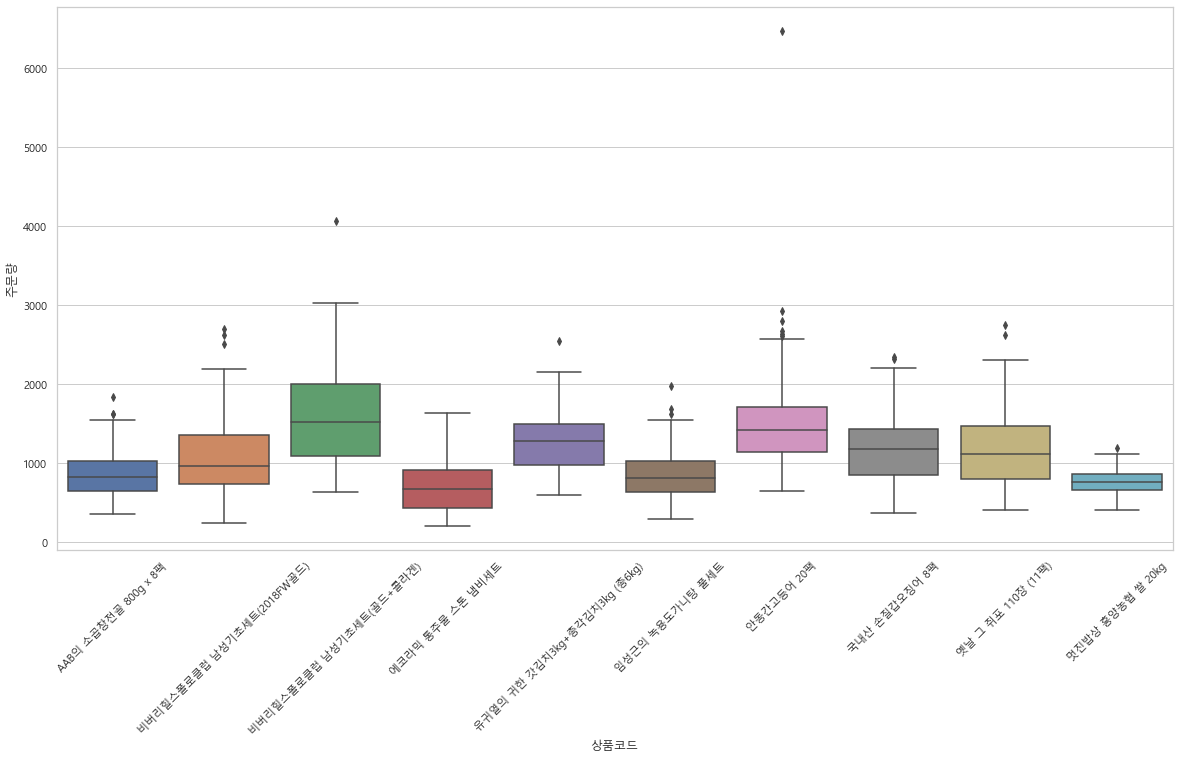

In [22]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="상품코드", y="주문량", data=df3[df3["상품코드"].isin(set(prfm_tmp3["상품코드"]))])
ax.set_xticklabels(df3[df3["상품코드"].isin(set(prfm_tmp3["상품코드"]))].sort_values(by="상품코드")["상품명"].unique(), rotation=45)

취급액 순위<br/>
1. 안동간고등어 20팩<br/>
2. AAB의 소곱창전골 800g x 8팩<br/>
3. 한일 대용량 스텐 분쇄믹서기<br/>
4. 국내산 손질갑오징어 8팩<br/>
5. 에코라믹 통주물 스톤 냄비세트



주문량 순위<br/>
1. 안동간고등어 20팩<br/>
2. AAB의 소곱창전골 800g x 8팩<br/>  
3. 국내산 손질갑오징어 8팩<br/>
4. 비버리힐스폴로클럽 남성기초세트(2018FW골드)<br/>
5. 비버리힐스폴로클럽 남성기초세트(골드+콜라겐)

-----------
__농수산물, 주방이 취급액이 높은 것으로 확인<br/> 농수축 방송 횟수 순위가 높지 않았음에도 불구하고 주문량 분포는 높음을 알 수 있음<br/>이미용은 방송 횟수가 낮은 편인데 비버리힐스폴로클럽..?은 순위권에 2개나 존재__

#### 월별 주문량

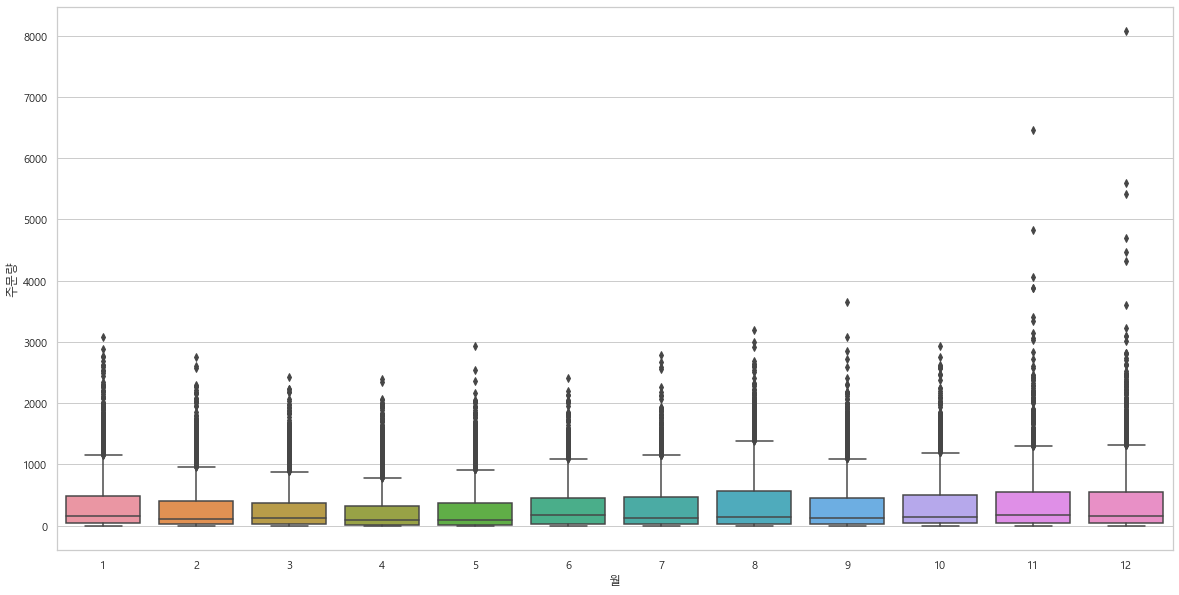

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(x="월",y="주문량",data=df3)

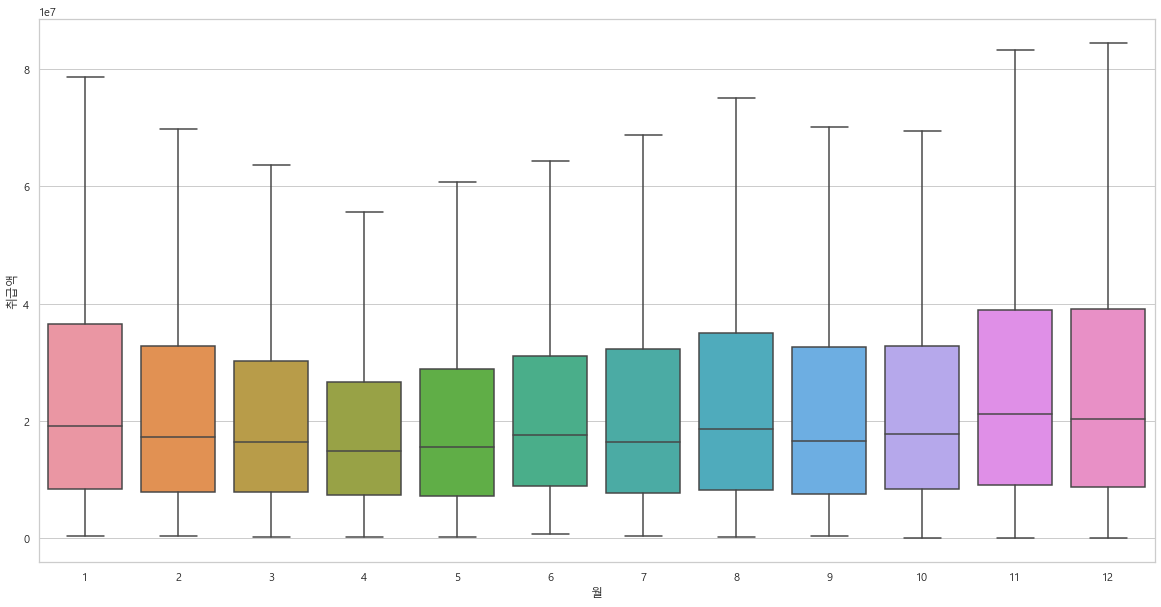

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(x="월",y="취급액",data=df3, showfliers=False)

#### 일별 주문량

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="일", y="주문량", data=df3, )

__일별로 거의 차이가 없는 주문량 분포__

#### 시간별 주문량

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df3)

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="취급액", data=df3)

__16,17,18시가 가장 활발한 주문 시간<br/> 21,22시는 주문이 가장 적음__

#### 요일별 주문량

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="요일",y="주문량",data=df3)

__요일별로 거의 차이가 없는 주문량 분포__

In [ ]:
df3_tmp = df3.groupby("방송일시")["주문량"].sum().reset_index()
df3_tmp2 = df3.groupby("방송일시")["취급액"].sum().reset_index()

In [ ]:
plt.figure(figsize=(100,30))
df3_tmp.set_index(keys="방송일시").plot()

In [ ]:
df3_tmp2.set_index(keys="방송일시").plot()

__2020년대 초에 주문량이 상승한 추세 --> why?__

#### 상품군별 판매단가에 따라서 주문량이 어떻게 달라질까?

1. 판매단가를 100원 단위에서 반올림해서 사용하자.

In [ ]:
df4 = df3.copy()

In [ ]:
df4["판매단가"] = np.round(df3["판매단가"],-3)

2. 상품군별 판매단가 분포 확인

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="상품군",y="판매단가", data=df4)

3. 상품군별로 판매단가와 취급액의 월별 상관관계 분석 

In [ ]:
corr_a_d = lambda x: x["판매단가"].corr(x["취급액"])

grouped = df4.groupby(["월","상품군"])

pd.DataFrame(grouped.apply(corr_a_d)).reset_index()

4. 상품군별로 판매단가와 취급액의 요일별 상관관계 분석 

In [ ]:
corr_a_d = lambda x: x["판매단가"].corr(x["취급액"])

grouped = df4.groupby(["요일","상품군"])

pd.DataFrame(grouped.apply(corr_a_d)).reset_index()

In [ ]:
grouped2 = df4.groupby(["상품군","상품코드"])[["상품군","상품코드","주문량","방송일시","판매단가"]]

등장 순서에 따라 번호 매기기

In [ ]:
df5 = df4.copy()
df5["일별방송순서"] = df4.groupby(["연","월","일","상품명"])["상품코드"].rank(method="first")
df5["월별방송순서"] = df4.groupby(["연","월","상품명"])["상품코드"].rank(method="first")

In [ ]:
df5["월별방송순서"].value_counts()

In [ ]:
pd.set_option("display.max_rows", 500)

In [ ]:
df5[df5["상품코드"] == 201009]

#### 방송순서에 따른 주문량

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="일별방송순서", y="주문량", data=df5)

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="월별방송순서", y="취급액", data=df5)

#### 상품 카테고리별 노출(분)에 따른 주문량 분포

노출 시간 반올림해주기

In [ ]:
df5["노출_5"] = df5["노출(분)"].apply(lambda x: round(x/5)*5)
df5["노출_10"] = df5["노출(분)"].apply(lambda x: round(x,-1))

In [ ]:
df5["노출_5"].value_counts()

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="상품군", y="주문량", hue="노출_5",data=df5)

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="상품군", y="주문량", hue="노출_10",data=df5)

In [ ]:
df5["상품군"].unique()

plt.figure(figsize=(20,10))

fig, axes = plt.subplots(2,6, figsize=(20,10))


ax = sns.boxplot(x="시간", y="주문량", hue="노출_10", data=df5[df5["상품군"] == "의류"],
                ax = axes[0,0])
ax = sns.boxplot(x="시간", y="주문량", hue="노출_10", data=df5[df5["상품군"] == "속옷"],
                ax = axes[0,1])
ax = sns.boxplot(x="시간", y="주문량", hue="노출_10", data=df5[df5["상품군"] == "주방"],
                ax = axes[0,2])
ax = sns.boxplot(x="시간", y="주문량", hue="노출_10", data=df5[df5["상품군"] == "농수축"],
                ax = axes[0,3])
ax = sns.boxplot(x="시간", y="주문량", hue="노출_10", data=df5[df5["상품군"] == "이미용"],
                ax = axes[0,4])
ax = sns.boxplot(x="시간", y="주문량", hue="노출_10", data=df5[df5["상품군"] == "가전"],
                ax = axes[0,5])
ax = sns.boxplot(x="시간", y="주문량", hue="노출_10", data=df5[df5["상품군"] == "생활용품"],
                ax = axes[1,0])
ax = sns.boxplot(x="시간", y="주문량", hue="노출_10", data=df5[df5["상품군"] == "건강기능"],
                ax = axes[1,1])
ax = sns.boxplot(x="시간", y="주문량", hue="노출_10", data=df5[df5["상품군"] == "잡화"],
                ax = axes[1,2])
ax = sns.boxplot(x="시간", y="주문량", hue="노출_10", data=df5[df5["상품군"] == "가구"],
                ax = axes[1,3])
ax = sns.boxplot(x="시간", y="주문량", hue="노출_10", data=df5[df5["상품군"] == "침구"],
                ax = axes[1,4])

In [ ]:
df5["계절"] = df5["월"].map({3:"봄",4:"봄",5:"봄",6:"여름",7:"여름",8:"여름",9:"가을",10:"가을",11:"가을",12:"겨울",1:"겨울",2:"겨울"})

In [ ]:
plt.figure(figsize=(20,10))
sns.pointplot(x="계절", y="취급액", data=df5.groupby("계절")["취급액"].mean().reset_index(), order=["봄","여름","가을","겨울"])

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="취급액", hue="상품군", data=df5, showfliers = False)

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", hue="상품군", data=df5, showfliers = False)

시즌별 취급액 변화 확인<br/>
시간별 상품군별 취급액 확인

##### 의류

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df5.loc[lambda x:x.상품군 == "의류"], showfliers = False)

##### 속옷

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df5.loc[lambda x:x.상품군 == "속옷"], showfliers = False)

##### 주방

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df5.loc[lambda x:x.상품군 == "주방"], showfliers = False)

##### 농수축

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df5.loc[lambda x:x.상품군 == "농수축"], showfliers = False)

##### 이미용

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df5.loc[lambda x:x.상품군 == "이미용"], showfliers = False)

##### 가전

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df5.loc[lambda x:x.상품군 == "가전"], showfliers = False)

##### 생활용품

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df5.loc[lambda x:x.상품군 == "생활용품"], showfliers = False)

###### 건강기능

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df5.loc[lambda x:x.상품군 == "건강기능"], showfliers = False)

##### 잡화

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df5.loc[lambda x:x.상품군 == "잡화"], showfliers = False)

##### 가구

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df5.loc[lambda x:x.상품군 == "가구"], showfliers = False)

##### 침구

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df5.loc[lambda x:x.상품군 == "침구"], showfliers = False)

### Test

#### 분석에 맞지 않는 데이터 제거

In [ ]:
df_test = test.copy()

상품군이 무형인 데이터 제거

In [ ]:
df_test = df_test[df_test["상품군"] != "무형"]

판매단가가 0인 데이터 => 없음

In [ ]:
df_test[df_test["판매단가"] == 0]

In [ ]:
df_test["연"] = test["방송일시"].dt.year
df_test["월"] = test["방송일시"].dt.month
df_test["일"] = test["방송일시"].dt.day
df_test["시간"] = test["방송일시"].dt.hour
df_test["분"] = test["방송일시"].dt.minute
df_test["요일"] = test["방송일시"].dt.weekday

In [ ]:
df_test.shape, test.shape

대략 175개 데이터 제거

#### 상품군별 분포

In [ ]:
plt.figure(figsize=(13,5))
sns.countplot(x="상품군", data=df_test)

__train: 주방, 가전상품군 방송 횟수 다수<br/> 의외로 농수축은 방송 횟수가 그리 높지 않음<br/>
test: 가전 > 농수축 > 생활용품 > 속옷 순<br/> 주방은 높지 않음__ 

#### 상품군별 판매단가 분포

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="상품군",y="판매단가", data=df_test)

### rating

In [ ]:
pd.set_option("display.max_columns", 500)

In [ ]:
rating.head()

In [ ]:
df5.to_csv("../../data/pre/preprocessed1.csv", index=False)

## visualization after preprocessing

In [ ]:
preprocessed = pd.read_csv("../../data/pre/preprocessed3.csv")

In [ ]:
preprocessed.columns

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="평균유동인구수", y="취급액", hue="월",data=preprocessed,sizes=(40, 400),alpha=0.7, s= 50)

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="평균유동인구수", y="취급액", hue="계절",data=preprocessed,sizes=(40, 400),alpha=0.7, s= 50)